In [1]:
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature

import cftime

In [2]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [124]:
#To compute de climatoloy
yearC1='2004'
yearC2='2009'

In [125]:
analisisDir='/Users/pvb/Dropbox/Oceanografia/Analisis/IEOOSWebPage'

In [126]:
Titulos = ['Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán']
Titulos_short = ['LEB', 'NOR','CAN','SUD','ESA']

In [127]:
i=3

titulo = Titulos[i]
titulo_short = Titulos_short[i]

Title  = 'Temperatura superficial en la '+ titulo
FileIn =  analisisDir+'/data/sstLD_anom_'+titulo_short+'.nc'
FileOut = analisisDir+'/images/map_sstd_anom_'+titulo_short+'.png'

In [128]:
# Load the data from the .txt file
lon, lat = [], []
with open('./LimiteDemarcaciones/Demarcacion'+titulo_short+'.txt', 'r') as f:
    for line in f:
        # Split the line by whitespace and append the values
        longitude, latitude = map(float, line.split())
        lon.append(longitude)
        lat.append(latitude)

## Read the data

In [129]:
DC=xr.open_dataset('~/Dropbox/Oceanografia/Analisis/ComparisonClimatologies/Data/RG_Global.nc')

In [140]:
if titulo_short == 'LEB':
        #sst = DS.sst.sel(lat=).sel(lon=slice(0,8))
        DC_temp=DC.temperature.sel(lat=slice(35.5,42.5)).sel(lon=slice(360+0,360+8))
        DC_salt=DC.salinity.sel(lat=slice(35.5,42.5)).sel(lon=slice(360+0,360+8))
        print('>>>>> '+titulo)        
elif  titulo_short == 'NOR':
        #sst = DS.sst.sel(lat=slice(41.8,46.2)).sel(lon=slice(348.5,359.5))
        DC_temp=DC.temperature.sel(lat=slice(41.5,47.3)).sel(lon=slice(346,359.5))
        DC_salt=DC.salinity.sel(lat=slice(41.5,47.3)).sel(lon=slice(346,359.5))
        print('>>>>> '+titulo)        
elif  titulo_short == 'CAN':
        DC_temp=DC.temperature.sel(lat=slice(24.3,32.5)).sel(lon=slice(336,350))
        DC_salt=DC.salinity.sel(lat=slice(24.3,32.5)).sel(lon=slice(336,350))
        print('>>>>> '+titulo)
elif  titulo_short == 'SUD':
        sliceLat=slice(35.25,37.5)
        sliceLon=slice(351,354)
        DC_temp=DC.temperature.sel(lat=sliceLat).sel(lon=sliceLon)
        DC_salt=DC.salinity.sel(lat=sliceLat).sel(lon=sliceLon)
        print('>>>>> '+titulo)
elif  titulo_short == 'ESA':
        #sst = DS.sst.sel(lat=slice(35.5,37)).sel(lon=slice(354,359))
        print('>>>>> '+titulo)

>>>>> Demarcación sudatlántica


In [141]:
titulo_short

'SUD'

In [142]:
meanTemp=DC_temp.mean('time').sel(pre=0, method='nearest')
meanTemp

<xarray.DataArray 'temperature' (lat: 3, lon: 3)> Size: 36B
array([[19.596558, 19.487202,       nan],
       [18.770502, 18.680086,       nan],
       [      nan,       nan,       nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 12B 351.5 352.5 353.5
  * lat      (lat) float32 12B 35.5 36.5 37.5
    pre      float32 4B 2.5

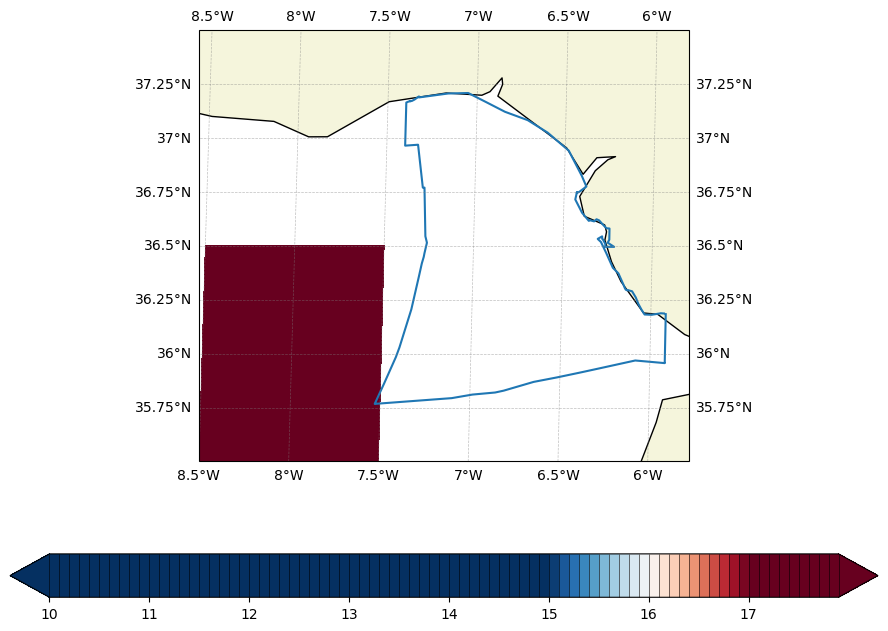

In [143]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

cm = ax.contourf(meanTemp.lon,meanTemp.lat,meanTemp, levels=np.arange(10,18,0.1), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = 15,vmax = 17,extend='both')

land = cartopy.feature.NaturalEarthFeature('physical', 'land', edgecolor='k', scale = '50m' ,
        facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
    

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=np.arange(10,18,1), 
                  drawedges=True)

ax.plot(lon, lat, transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--')
#ax.set_title(Title + ', ' + sst.time.dt.strftime("%d %B %Y").values + '\n');
#    plt.savefig(FileOut)


In [82]:
prof_mean_temp = DC_temp.stack(flat_dim=('lon', 'lat','time')).mean('flat_dim')
prof_std_temp  = DC_temp.stack(flat_dim=('lon', 'lat','time')).std('flat_dim')

prof_mean_salt = DC_salt.stack(flat_dim=('lon', 'lat','time')).mean('flat_dim')
prof_std_salt  = DC_salt.stack(flat_dim=('lon', 'lat','time')).std('flat_dim')

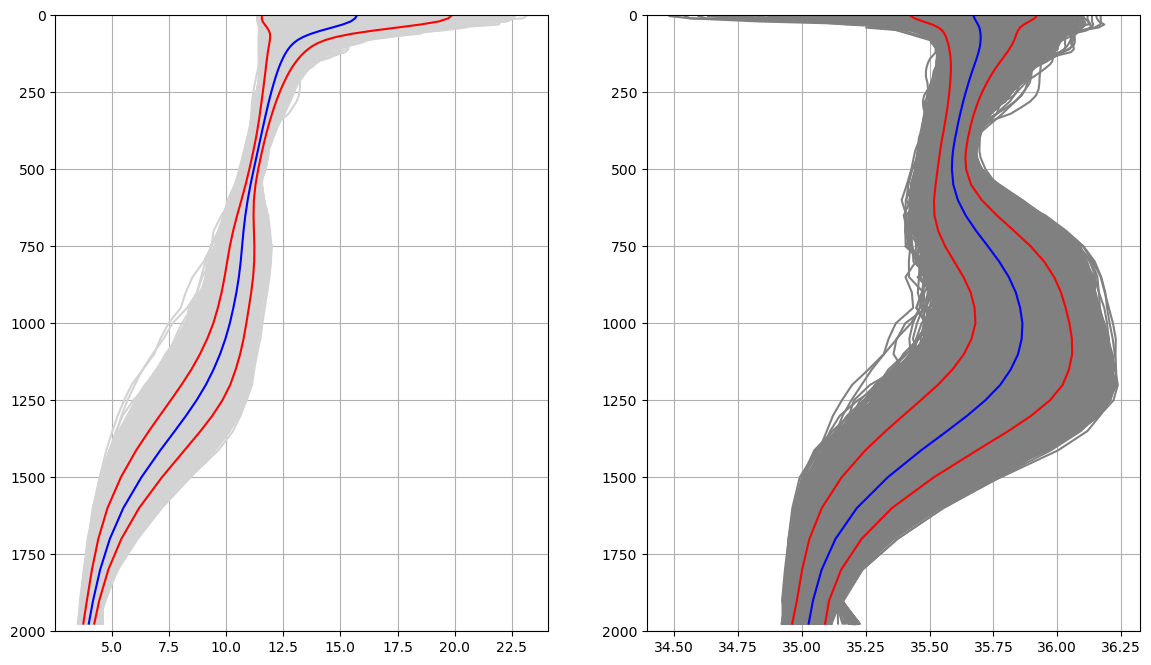

In [90]:
fig,ax= plt.subplots(1,2,figsize=(14,8))

ax[0].plot(DC_temp.stack(flat_dim=('lon', 'lat','time')),DC_temp.pre, color='lightgrey')
ax[0].plot(prof_mean_temp,prof_mean_temp.pre,color='blue')  
ax[0].plot(prof_mean_temp+1.5*prof_std_temp,prof_mean_temp.pre,color='red')  
ax[0].plot(prof_mean_temp-1.5*prof_std_temp,prof_mean_temp.pre,color='red')  
ax[0].invert_yaxis()
ax[0].set_ylim([2000,0]);
ax[0].grid()

ax[1].plot(DC_salt.stack(flat_dim=('lon', 'lat','time')),DC_temp.pre, color='grey')
ax[1].plot(prof_mean_salt,prof_mean_temp.pre,color='blue')  
ax[1].plot(prof_mean_salt+1.5*prof_std_salt,prof_mean_salt.pre,color='red')  
ax[1].plot(prof_mean_salt-1.5*prof_std_salt,prof_mean_salt.pre,color='red')  
ax[1].invert_yaxis()
ax[1].set_ylim([2000,0]);
ax[1].grid()

## Seasonal cycle
Create seasonal climatology from 1982 to 1992 and the asociated anomaly

In [87]:
#Create monthly climatology
DC_temp_clim = DC_temp.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();
DC_salt_clim = DC_salt.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

#Create anomaly
DC_temp_anom = DC_temp.groupby('time.month') - DC_temp_clim
DC_temp_anom.load();

DC_salt_anom = DC_salt.groupby('time.month') - DC_salt_clim
DC_salt_anom.load();

In [120]:
DC_temp_clim

<xarray.DataArray 'temperature' (month: 12, pre: 58, lat: 6, lon: 14)> Size: 234kB
array([[[[14.6065   , 14.566667 , 14.586499 , ...,        nan,
                 nan,        nan],
         [14.179666 , 14.161334 , 14.097499 , ...,        nan,
                 nan,        nan],
         [13.781833 , 13.762168 , 13.603833 , ...,        nan,
                 nan,        nan],
         [13.433167 , 13.447667 , 13.332833 , ..., 12.8815   ,
                 nan,        nan],
         [13.222333 , 13.212998 , 13.076165 , ..., 12.561667 ,
                 nan,        nan],
         [12.936001 , 12.903667 , 12.883667 , ...,        nan,
                 nan,        nan]],

        [[14.6065   , 14.5685   , 14.585999 , ...,        nan,
                 nan,        nan],
         [14.178166 , 14.159833 , 14.096335 , ...,        nan,
                 nan,        nan],
         [13.778333 , 13.757833 , 13.600667 , ...,        nan,
                 nan,        nan],
         [13.4313345, 13.444667 , 13.331332 , ..., 12.891667 ,
...
                 nan,        nan],
         [ 4.020167 ,  4.0569997,  4.0768332, ...,  4.4895   ,
                 nan,        nan],
         [ 3.8531666,  3.8966663,  3.9309998, ...,  4.4408336,
                 nan,        nan],
         [ 3.7283332,  3.7876663,  3.8500001, ...,        nan,
                 nan,        nan]],

        [[ 4.0805   ,  4.079334 ,  4.1003337, ...,        nan,
                 nan,        nan],
         [ 3.977333 ,  3.9758337,  3.9595   , ...,        nan,
                 nan,        nan],
         [ 3.849    ,  3.873    ,  3.8836668, ...,        nan,
                 nan,        nan],
         [ 3.7768333,  3.8071668,  3.838    , ...,  4.5181665,
                 nan,        nan],
         [ 3.6898334,  3.7155   ,  3.7431667, ...,  4.189167 ,
                 nan,        nan],
         [ 3.6068332,  3.6256666,  3.6593335, ...,        nan,
                 nan,        nan]]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 56B 346.5 347.5 348.5 349.5 ... 357.5 358.5 359.5
  * lat      (lat) float32 24B 41.5 42.5 43.5 44.5 45.5 46.5
  * pre      (pre) float32 232B 2.5 10.0 20.0 30.0 ... 1.8e+03 1.9e+03 1.975e+03
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

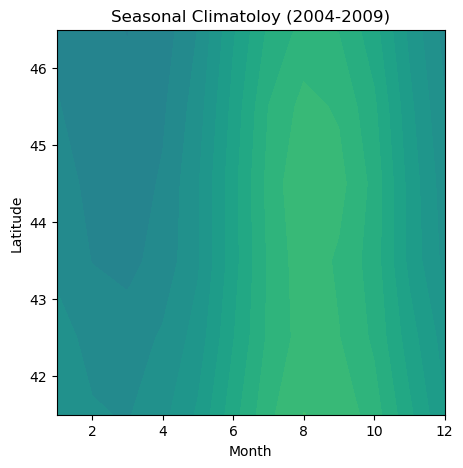

In [89]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(DC_temp_clim.mean(dim='lon').sel(pre=10, method='nearest').month,
                 DC_temp_clim.mean(dim='lon').sel(pre=10, method='nearest').lat,
                 DC_temp_clim.mean(dim='lon').sel(pre=10, method='nearest').transpose(),
            levels=12, vmin=-2, vmax=30)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

# Weighted mean

In [92]:
weights = np.cos(np.deg2rad(DC.temperature.lat))
weights = weights/weights.max()
weights.name = "weights"
DC_temp_weighted = DC_temp.weighted(weights)
DC_salt_weighted = DC_salt.weighted(weights)
DC_temp_anom_weighted = DC_temp_anom.weighted(weights)
DC_salt_anom_weighted = DC_salt_anom.weighted(weights)


DC_temp_wmean = DC_temp_weighted.mean(("lon", "lat"),skipna=True).load()
DC_salt_wmean = DC_salt_weighted.mean(("lon", "lat"),skipna=True).load()

DC_temp_anom_wmean = DC_temp_anom_weighted.mean(("lon", "lat"),skipna=True).load()
DC_salt_anom_wmean = DC_salt_anom_weighted.mean(("lon", "lat"),skipna=True).load()

In [122]:
DC_temp_wmean

<xarray.DataArray 'temperature' (time: 243, pre: 58)> Size: 56kB
array([[13.385853 , 13.386722 , 13.384698 , ...,  4.4512753,  4.135071 ,
         3.9635096],
       [12.864767 , 12.864435 , 12.861573 , ...,  4.436794 ,  4.1376595,
         3.9618611],
       [12.673399 , 12.67257  , 12.672204 , ...,  4.490571 ,  4.1561956,
         3.9782825],
       ...,
       [13.814555 , 13.807676 , 13.792735 , ...,  4.5200953,  4.2130713,
         4.026461 ],
       [13.568785 , 13.557108 , 13.542566 , ...,  4.497634 ,  4.2433915,
         4.0534825],
       [13.266856 , 13.252754 , 13.233966 , ...,  4.4903426,  4.2183576,
         4.032509 ]], dtype=float32)
Coordinates:
  * pre      (pre) float32 232B 2.5 10.0 20.0 30.0 ... 1.8e+03 1.9e+03 1.975e+03
  * time     (time) datetime64[ns] 2kB 2004-01-15 2004-02-15 ... 2024-03-15

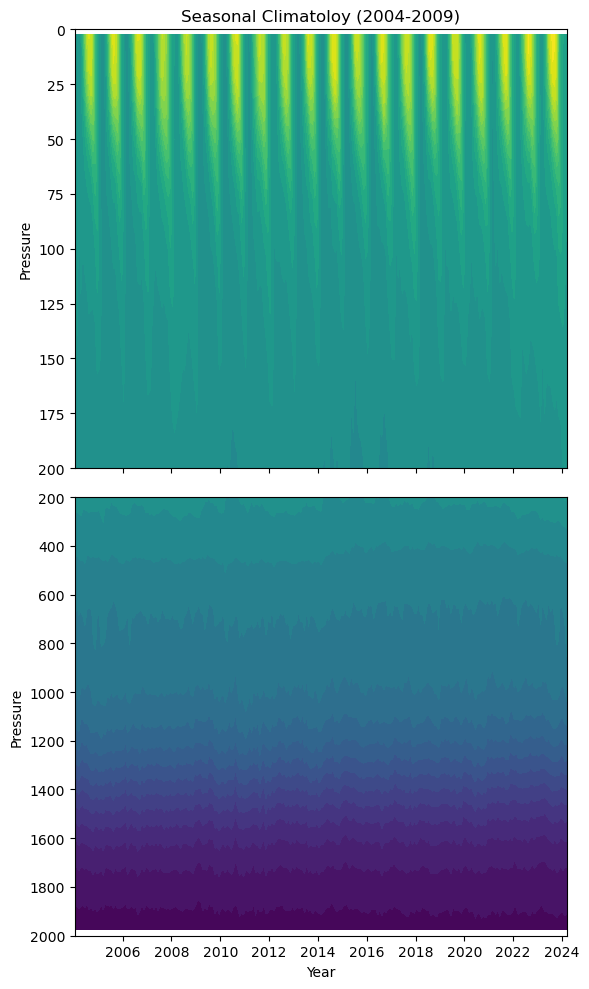

In [119]:
fig, ax = plt.subplots(2, 1 , sharex=True, figsize=(6,10))
ax[0].contourf(DC_temp_wmean.time, DC_temp_wmean.pre, 
            DC_temp_wmean.transpose(), 32)
ax[0].set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax[0].set_ylabel('Pressure') 
ax[0].invert_yaxis()
ax[0].set_ylim([200,0]);

ax[1].contourf(DC_temp_wmean.time, DC_temp_wmean.pre, 
            DC_temp_wmean.transpose(), 32)
ax[1].set_ylabel('Pressure') 
ax[1].set_xlabel('Year')
ax[1].invert_yaxis()
ax[1].set_ylim([2000,200]);

fig.tight_layout()


## smoothed versions

In [159]:
DC_temp_wmean_rolling = DC_temp_wmean.rolling(time=12,center=True).mean()
DC_salt_wmean_rolling = DC_salt_wmean.rolling(time=12,center=True).mean()

DC_temp_anom_wmean_rolling = DC_temp_anom_wmean.rolling(time=12,center=True).mean()
DC_salt_anom_wmean_rolling = DC_salt_anom_wmean.rolling(time=12,center=True).mean()

## Plots

In [160]:
Posiciones=[(0.10, 0.65, 0.8, 0.22),
            (0.10, 0.48, 0.8, 0.165),
            (0.10, 0.10, 0.8, 0.378)]

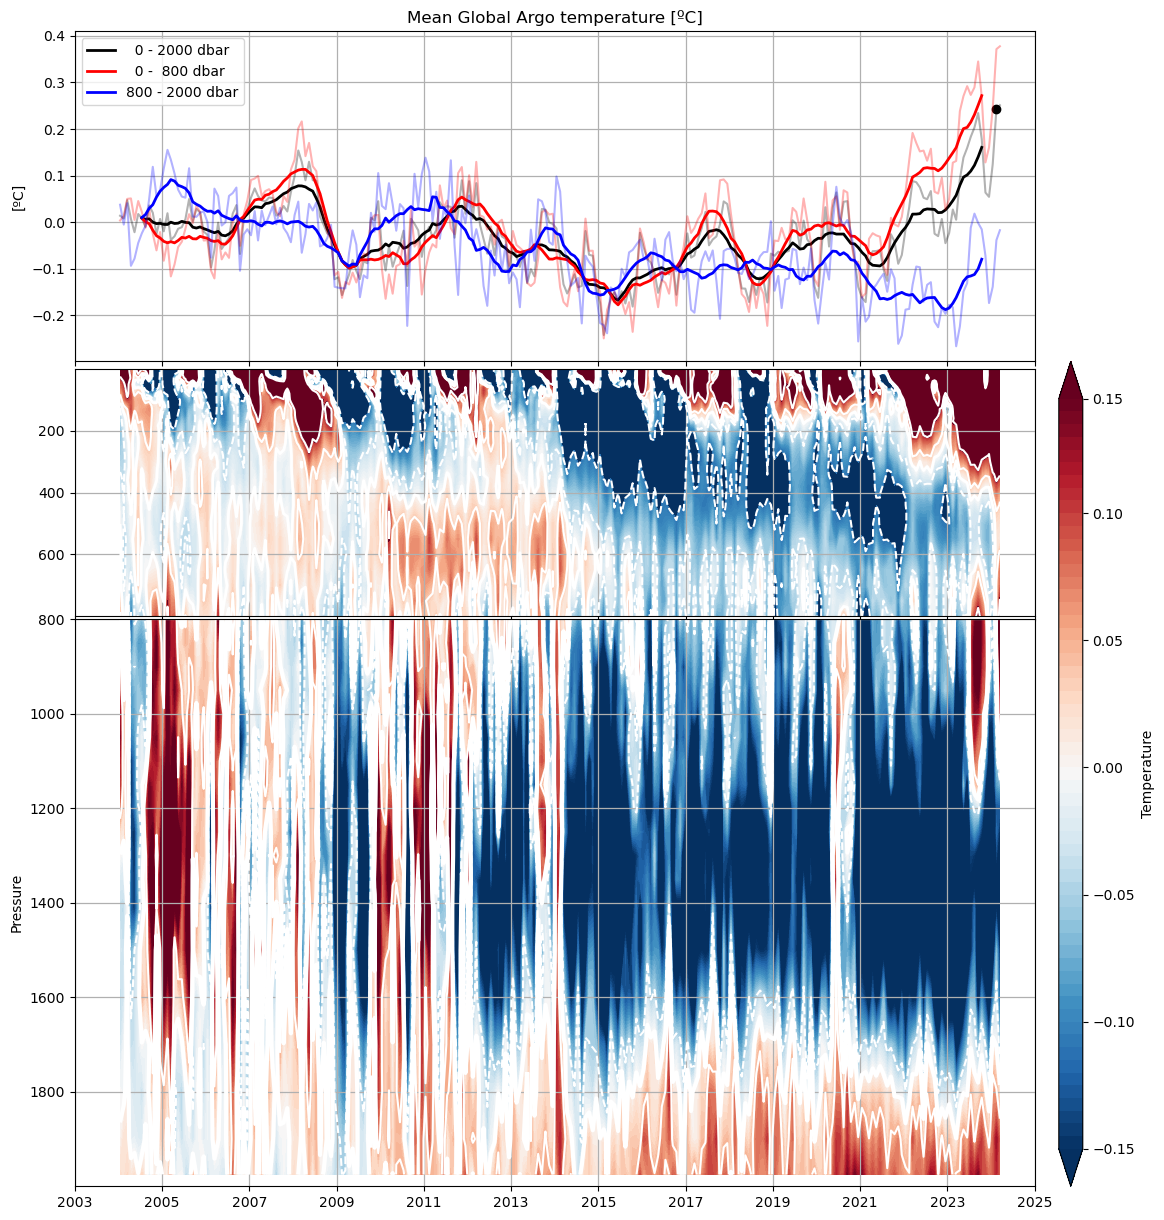

In [161]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)


# Mean values
ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(pre=slice(0,2000)).mean("pre"),color='k',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean.time[-2],
           DC_temp_anom_wmean.sel(pre=slice(0,2000)).mean("pre")[-2],'ko')
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(pre=slice(0,2000)).mean("pre"),linewidth=2,color='k',  label= '  0 - 2000 dbar')


ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(pre=slice(0,800)).mean("pre"),color='r',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(pre=slice(0,800)).mean("pre"),linewidth=2,color='r' ,  label= '  0 -  800 dbar')

ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(pre=slice(800,2000)).mean("pre"),color='b',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(pre=slice(800,2000)).mean("pre"),linewidth=2,color='b',label= '800 - 2000 dbar')
ax[0].grid(linestyle='-', linewidth=.9)
ax[0].set_position(Posiciones[0])
ax[0].legend()
ax[0].set_ylabel('[ºC]')
ax[0].set_title('Mean Global Argo temperature [ºC]')

# UpperOcean
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(pre=slice(0,800)).pre, 
              DC_temp_anom_wmean.sel(pre=slice(0,800)).transpose()
              ,colors='w',levels=[-0.15, -0.05, 0.05, 0.15] )
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(pre=slice(0,800)).pre, 
              DC_temp_anom_wmean.sel(pre=slice(0,800)).transpose(),colors='w', linewidths=2,
              levels=[0] )

ax[1].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(pre=slice(0,800)).pre, 
              DC_temp_anom_wmean.sel(pre=slice(0,800)).transpose(),
              cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both',vmin=-0.2, vmax=0.2)
ax[1].set_ylim(0,800)
ax[1].invert_yaxis()
ax[1].set_yticks([200,400,600])
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_position(Posiciones[1])

ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(pre=slice(800,2000)).pre, 
              DC_temp_anom_wmean.sel(pre=slice(800,2000)).transpose(),colors='w',
              levels=[-0.05,0.05] )
ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(pre=slice(800,2000)).pre, 
              DC_temp_anom_wmean.sel(pre=slice(800,2000)).transpose(),colors='w', linewidths=3,
              levels=[0] )
cntr2 = ax[2].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(pre=slice(800,2000)).pre, 
                      DC_temp_anom_wmean.sel(pre=slice(800,2000)).transpose(),
                      cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both')
ax[2].set_ylim(800,2000)
ax[2].invert_yaxis()
ax[2].set_yticks([800,1000,1200,1400,1600,1800])
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylabel('Pressure')

# Adding the colorbar
cbaxes = fig.add_axes([0.92, 0.1, 0.02, 0.55])  
cb = fig.colorbar(cntr2, cax=cbaxes);
cbaxes.set_yticks([-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15])
cbaxes.set_ylabel('Temperature')

# xtick Labels
ax[0].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[1].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[2].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));

ax[2].set_xticklabels(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN').strftime('%Y'));

### Salinity

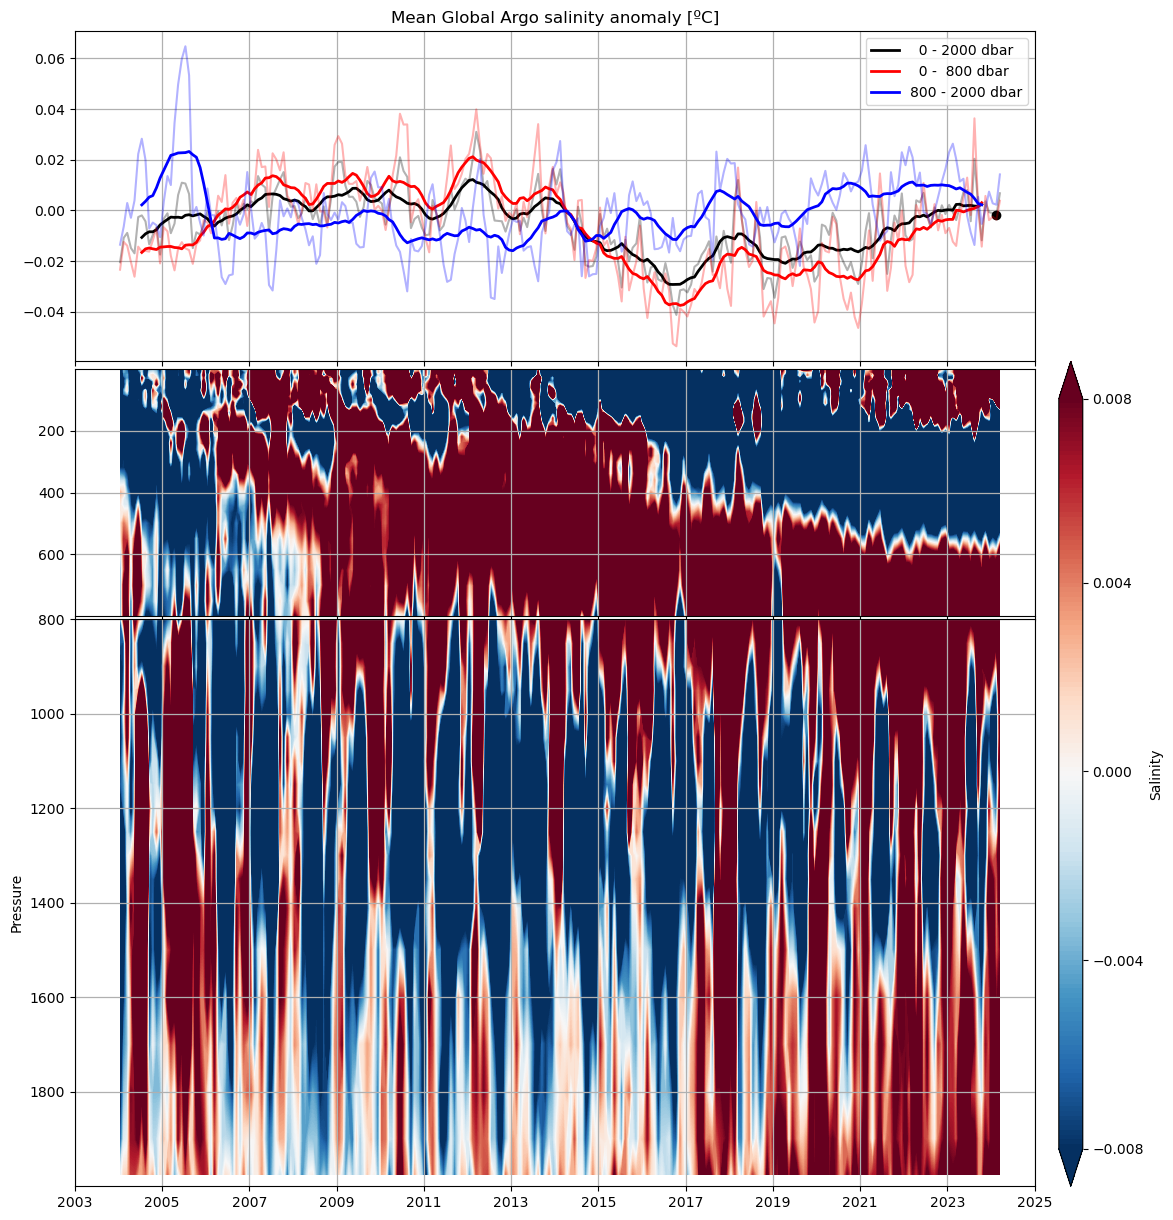

In [36]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)

# Mean values
ax[0].plot(DC_salt_anom_wmean.time,
           DC_salt_anom_wmean.sel(pre=slice(0,2000)).mean("pre"),color='k',alpha=0.3)
ax[0].plot(DC_salt_anom_wmean.time[-2],
           DC_salt_anom_wmean.sel(pre=slice(0,2000)).mean("pre")[-2],'ko')
ax[0].plot(DC_salt_anom_wmean_rolling.time,
           DC_salt_anom_wmean_rolling.sel(pre=slice(0,2000)).mean("pre"),linewidth=2,color='k',  label= '  0 - 2000 dbar')


ax[0].plot(DC_salt_anom_wmean.time,
           DC_salt_anom_wmean.sel(pre=slice(0,800)).mean("pre"),color='r',alpha=0.3)
ax[0].plot(DC_salt_anom_wmean_rolling.time,
           DC_salt_anom_wmean_rolling.sel(pre=slice(0,800)).mean("pre"),linewidth=2,color='r' ,  label= '  0 -  800 dbar')

ax[0].plot(DC_salt_anom_wmean.time,
           DC_salt_anom_wmean.sel(pre=slice(800,2000)).mean("pre"),color='b',alpha=0.3)
ax[0].plot(DC_salt_anom_wmean_rolling.time,
           DC_salt_anom_wmean_rolling.sel(pre=slice(800,2000)).mean("pre"),linewidth=2,color='b',label= '800 - 2000 dbar')

ax[0].grid(linestyle='-', linewidth=.9)
ax[0].set_position(Posiciones[0])
ax[0].legend()
ax[2].set_ylabel('[ºC]')
ax[0].set_title('Mean Global Argo salinity anomaly [ºC]')

ax[1].contourf(DC_salt_anom_wmean.time, DC_salt_anom_wmean.sel(pre=slice(0,800)).pre, 
                      DC_salt_anom_wmean.sel(pre=slice(0,800)).transpose(),20,cmap='RdBu_r',levels=np.arange(-0.008,.008,0.0001),extend='both')
ax[1].invert_yaxis()
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_ylim(0,800)
ax[1].invert_yaxis()
ax[1].set_yticks([200,400,600])
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_position(Posiciones[1])

cntr2 = ax[2].contourf(DC_salt_anom_wmean.time, DC_salt_anom_wmean.sel(pre=slice(800,2000)).pre, 
                      DC_salt_anom_wmean.sel(pre=slice(800,2000)).transpose(),20,cmap='RdBu_r',levels=np.arange(-0.008,.008,0.0001),extend='both')
ax[2].invert_yaxis()
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylim(800,2000)
ax[2].invert_yaxis()
ax[2].set_yticks([800,1000,1200,1400,1600,1800])
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylabel('Pressure')

# Adding the colorbar
cbaxes = fig.add_axes([0.92, 0.1, 0.02, 0.55])  
cb = fig.colorbar(cntr2, cax=cbaxes);
cbaxes.set_yticks([-0.008, -0.004,  0, 0.004, .008])
cbaxes.set_ylabel('Salinity')

# xtick Labels
ax[0].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[1].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[2].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));

ax[2].set_xticklabels(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN').strftime('%Y'));


Text(0.5, 1.0, 'Mean Global Argo temperature [ºC]')

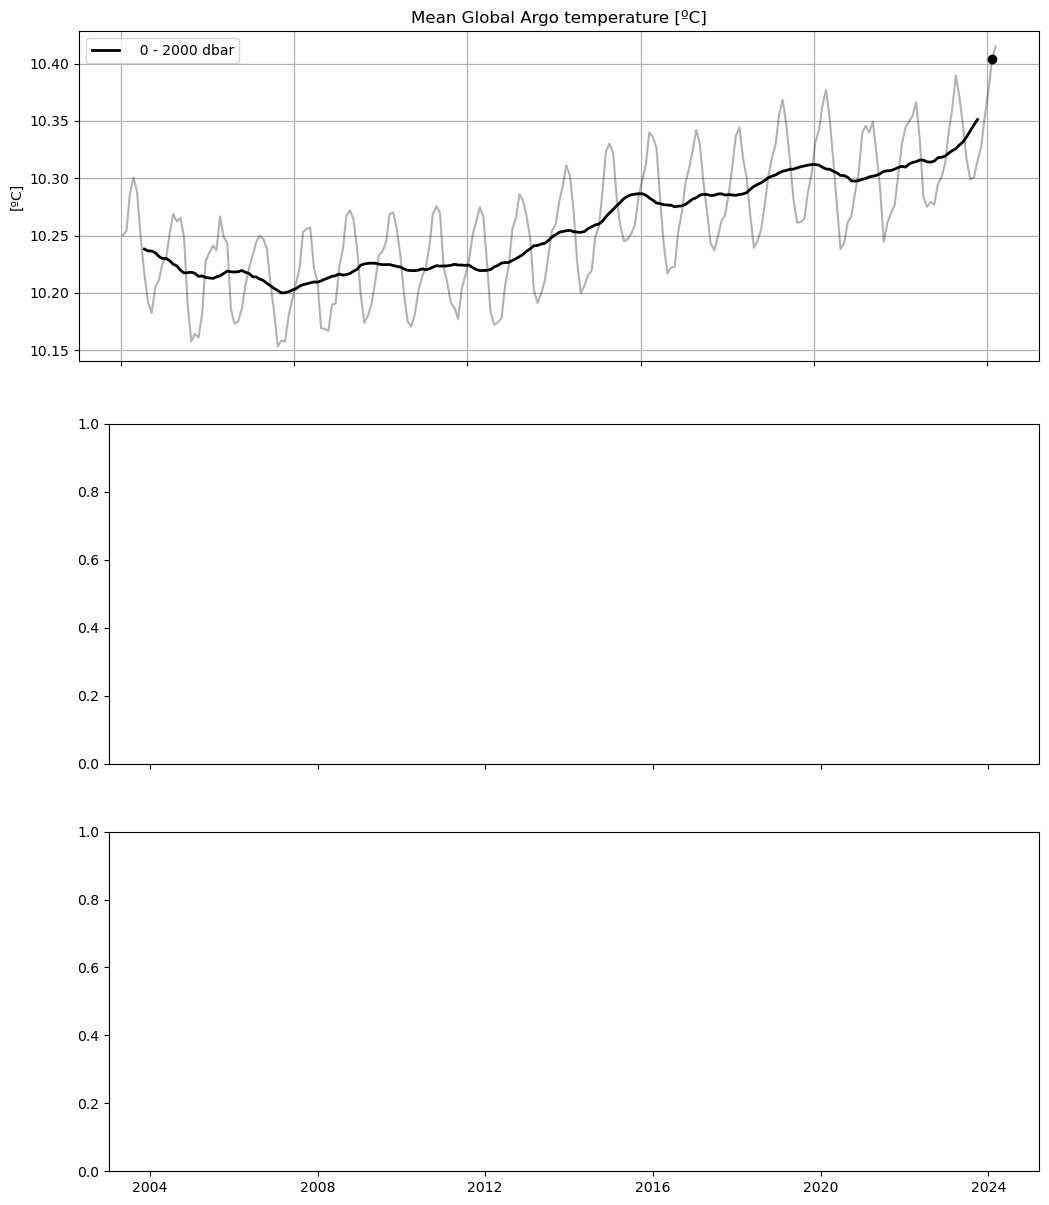

In [15]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)


# Mean values
ax[0].plot(DC_temp_wmean.time,
           DC_temp_wmean.sel(pre=slice(0,2000)).mean("pre"),color='k',alpha=0.3)
ax[0].plot(DC_temp_wmean.time[-2],
           DC_temp_wmean.sel(pre=slice(0,2000)).mean("pre")[-2],'ko')
ax[0].plot(DC_temp_wmean_rolling.time,
           DC_temp_wmean_rolling.sel(pre=slice(0,2000)).mean("pre"),linewidth=2,color='k',  label= '  0 - 2000 dbar')

ax[0].grid(linestyle='-', linewidth=.9)
ax[0].set_position(Posiciones[0])
ax[0].legend()
ax[0].set_ylabel('[ºC]')
ax[0].set_title('Mean Global Argo temperature [ºC]')
